In [7]:
from ase.io import read, iread
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


/gpfs/home/smdick/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['log']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [8]:
base_path = '/gpfs/scratch/smdick/mixer/'
runs1 = ['uc_sz_5', 'uc_sz_10', 'uc_sz_15', 'mull_szp_5', 'descr_szp_5']
runs2 = ['descr_sz_5', 'descr_sz_10', 'descr_sz_15', 'mull_szp_10']
runs = runs1 + runs2

In [9]:
traj_list_1 = []
traj_list_2 = []
log_list = []
for run in runs1:
    traj_list_1.append(read(base_path + run +'/md_siesta.traj', ':'))
    log_list.append(pd.read_csv(base_path + run + '/md_siesta.log', 
                                delim_whitespace = True, index_col = 0).drop('Time[ps]'))
for run in runs2:
    traj_list_2.append(read(base_path + run +'/md_siesta.traj', ':'))
    log_list.append(pd.read_csv(base_path + run + '/md_siesta.log',
                                delim_whitespace = True, index_col = 0).drop('Time[ps]'))

max_len = max([len(traj) for traj in traj_list_1])

/gpfs/home/smdick/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


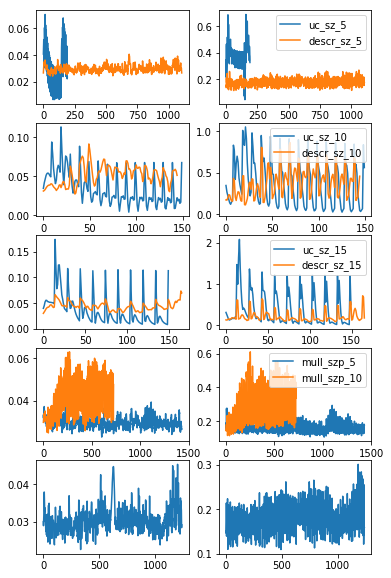

In [10]:
figsize(6,10)
for u, [traj, run] in enumerate(zip(traj_list_1, runs1)):
    dx = []
    dv = []
    for i,t in enumerate(traj[1:]):
        dx.append(np.linalg.norm(t.get_positions() - traj[i].get_positions(),axis= -1))
        dv.append(np.linalg.norm(t.get_velocities() - traj[i].get_velocities(), axis = -1))
    subplot(np.ceil((len(traj_list_1) + len(traj_list_2))/2),2, 2*u+1)
    plot([d.max() for d in dx][:max_len], label = run)
    subplot(np.ceil((len(traj_list_1) + len(traj_list_2))/2),2, 2*u+2)
    plot([d.max() for d in dv][:max_len], label = run)
    
for u, [traj, run] in enumerate(zip(traj_list_2, runs2)):
    dx = []
    dv = []
    for i,t in enumerate(traj[1:]):
        dx.append(np.linalg.norm(t.get_positions() - traj[i].get_positions(),axis= -1))
        dv.append(np.linalg.norm(t.get_velocities() - traj[i].get_velocities(), axis = -1))
    subplot(np.ceil((len(traj_list_1) + len(traj_list_2))/2),2, 2*u+1)
    plot([d.max() for d in dx][:max_len], label = run)
    subplot(np.ceil((len(traj_list_1) + len(traj_list_2))/2),2, 2*u+2)
    plot([d.max() for d in dv][:max_len], label = run)
    
    legend()

In [11]:
for log, run in zip(log_list, runs):
    print(run + ' : {:.1f} +/- {:.1f} K'.format(log['T[K]'].astype(float).mean(),log['T[K]'].astype(float).std()))

uc_sz_5 : 349.8 +/- 355.6 K
uc_sz_10 : 711.4 +/- 748.1 K
uc_sz_15 : 855.2 +/- 1271.0 K
mull_szp_5 : 299.4 +/- 14.6 K
descr_szp_5 : 299.1 +/- 16.9 K
descr_sz_5 : 299.3 +/- 22.6 K
descr_sz_10 : 346.1 +/- 115.6 K
descr_sz_15 : 321.7 +/- 108.0 K
mull_szp_10 : 300.8 +/- 87.2 K
